In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
arr = np.array([1, 2, 3, 4, 5])

In [3]:
type(arr)

numpy.ndarray

In [4]:
arr.tolist()

[1, 2, 3, 4, 5]

In [5]:
arr

array([1, 2, 3, 4, 5])

In [6]:
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])

In [7]:
type(matrix)

numpy.ndarray

In [8]:
matrix.shape

(4, 3)

In [9]:
matrix.size

12

In [10]:
matrix[0, 0]

np.int64(1)

In [11]:
matrix[0, 0].item()

1

In [12]:
tmp = np.array([1, 2.5, "a", "abc", False])

In [13]:
tmp[0]

np.str_('1')

In [14]:
tmp[1]

np.str_('2.5')

In [15]:
row, column = matrix.shape

In [16]:
row

4

In [17]:
column

3

In [18]:
matrix.ndim

2

In [19]:
matrix.dtype

dtype('int64')

In [20]:
arr_zeros = np.zeros(5, dtype=int)

In [21]:
arr_zeros

array([0, 0, 0, 0, 0])

In [22]:
arr_zeros.dtype

dtype('int64')

In [23]:
arr_ones = np.ones(5)
arr_ones

array([1., 1., 1., 1., 1.])

In [24]:
arr_full = np.full(5, 7)
arr_full

array([7, 7, 7, 7, 7])

In [25]:
p17 = arr_ones + arr_full
p17

array([8., 8., 8., 8., 8.])

In [26]:
p17 * arr_zeros

array([0., 0., 0., 0., 0.])

In [27]:
np.linspace(0, 10, 5, dtype=int)

array([ 0,  2,  5,  7, 10])

In [28]:
np.linspace(0, 10, 7, dtype=int)

array([ 0,  1,  3,  5,  6,  8, 10])

In [29]:
np.linspace(0, 10, 7)

array([ 0.        ,  1.66666667,  3.33333333,  5.        ,  6.66666667,
        8.33333333, 10.        ])

---
# 정규 분포

In [30]:
mean = 0 # 평균
std_dev = 1 # 표준편차
size = 1_000_000

data = np.random.normal(loc=mean, scale=std_dev, size=size)

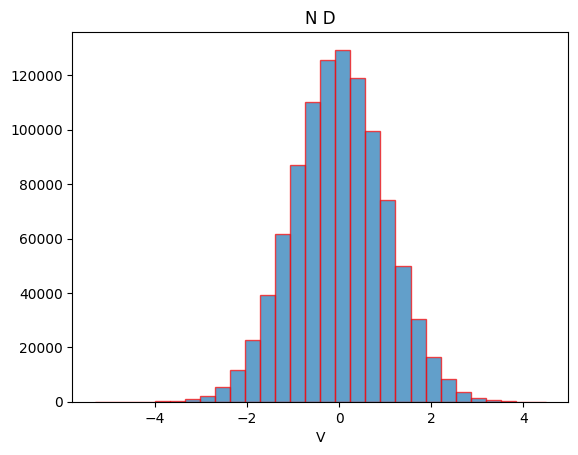

In [31]:
plt.hist(data, bins=30, edgecolor='red', alpha=0.7)
plt.title("N D")
plt.xlabel("V")
plt.show()

## 균등 분포

0-10 사이에 균등 분포를 갖는 1,000개의 샘플

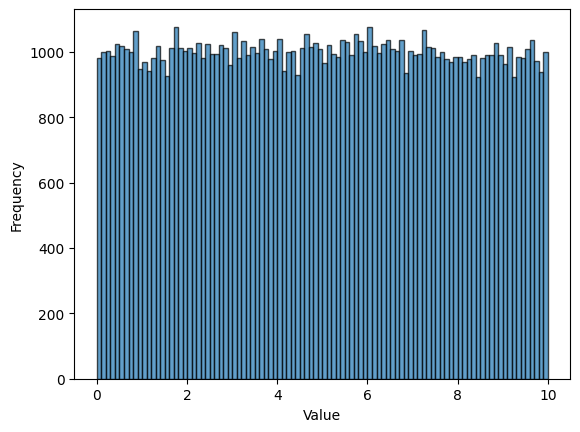

In [32]:
data = np.random.uniform(0, 10, 100000)
plt.hist(data, bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [33]:
data.min()

np.float64(7.17114340431646e-05)

In [34]:
data.max()

np.float64(9.999760676429512)

## 포아송분포

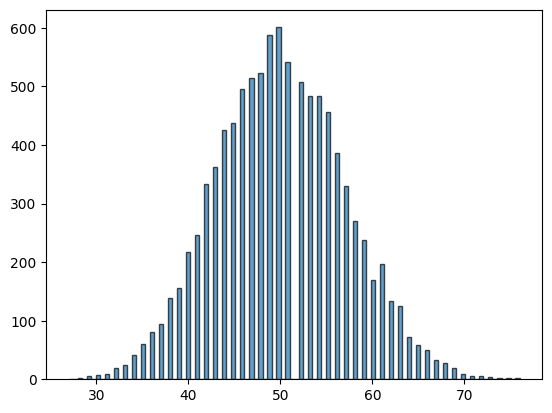

In [35]:
data = np.random.poisson(50, 10000)
plt.hist(data, bins=100, edgecolor='black', alpha=0.7)
plt.show()

---

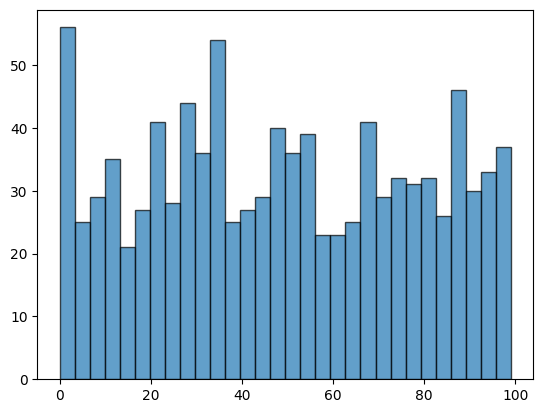

In [36]:
data = np.random.randint(0, 100, 1000)
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.show()

In [37]:
data = np.random.choice([1, 2, 3, 4, 5, 6, 7, 8, 9, 0], size=5, replace=False)
data

array([0, 8, 4, 9, 7])

---

In [38]:
import time
import random

In [39]:
def ger_r_array_choices(N):
    a = random.choices(range(101), k=N)
    b = random.choices(range(101), k=N)
    return a, b

start_time = time.time()
a, b = ger_r_array_choices(1_000_000)
end_time = time.time()

print(end_time - start_time)

0.2043778896331787


In [40]:
def ger_r_array_choices_np(N):
    a = np.random.choice(range(101), N)
    b = np.random.choice(range(101), N)
    return a, b

start_time = time.time()
a, b = ger_r_array_choices_np(1_000_000)
end_time = time.time()

print(end_time - start_time)

0.023473739624023438


### python과 numpy 속도 비교 차트 그려보기

linspace 1_000_000 까지 총 100번 구간을 찍어서 속도를 ㄹ인 그래프로 그려보기

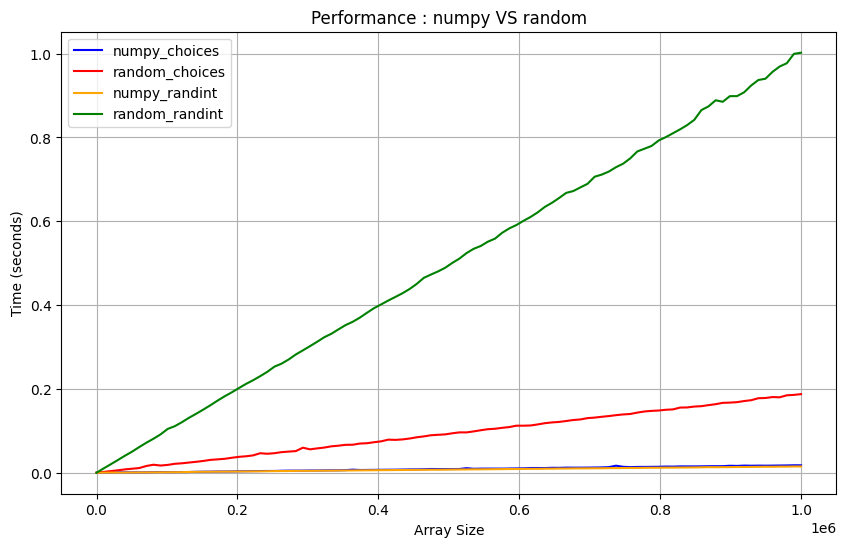

In [44]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# NumPy 기반 함수
def gen_r_array_choices_numpy(N):
    a = np.random.choice(range(101), size=N)
    b = np.random.choice(range(101), size=N)
    return a, b

def get_r_array_randint_numpy(N):
    a = np.random.randint(0, 101, size=N)
    b = np.random.randint(0, 101, size=N)
    return a, b

# Python random 기반 함수
def gen_r_array_choices(N):
    a = random.choices(range(101), k=N)
    b = random.choices(range(101), k=N)
    return a, b

def get_r_array_randint(N):
    a = [random.randint(0, 100) for _ in range(N)]
    b = [random.randint(0, 100) for _ in range(N)]
    return a, b

# 실행 시간 측정 함수
def measure_time(func, N):
    result, cnt = 0, 10
    for _ in range(cnt):
        start = time.time()
        func(N)
        result += time.time() - start
    return result / cnt

# 테스트할 N 값 생성
N_values = np.linspace(1, 1_000_000, 100, dtype=int)

# 실행 시간 측정
numpy_choices_times = [measure_time(gen_r_array_choices_numpy, N) for N in N_values]
random_choices_times = [measure_time(gen_r_array_choices, N) for N in N_values]
numpy_randint_times = [measure_time(get_r_array_randint_numpy, N) for N in N_values]
random_randint_times = [measure_time(get_r_array_randint, N) for N in N_values]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(N_values, numpy_choices_times, label='numpy_choices', color='blue')
plt.plot(N_values, random_choices_times, label='random_choices', color='red')
plt.plot(N_values, numpy_randint_times, label='numpy_randint', color='orange')
plt.plot(N_values, random_randint_times, label='random_randint', color='green')

plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Performance : numpy VS random')
plt.legend()
plt.grid(True)
plt.show()